# 实验二：回归模型
- 姓名：冯思程
- 学号：2112213
- 专业：计算机科学与技术

- 回归是监督学习的一个重要问题，回归用于预测**输入变量**和**输出变量**之间的关系，特别是当输入变量的值发生变化时，输出变量的值也随之发生变化。
- 回归模型是一种表示从输入变量到输出变量之间映射的函数
- 对连续值的预测
- 可以用合适的曲线揭示样本点随着自变量的变化关系


## 实验要求
截止日期：10月22日
作业的提交格式参考之前的说明，提交到18329300691@163.com
### 基本要求
将数据集winequality-white.csv按照4:1划分为训练集和测试集。
1. 构造线性回归模型，并采用批量梯度下降**和**随机梯度下降进行优化；输出训练集和测试集的均方误差（MSE），画出MSE收敛曲线。
1. 对于批量梯度下降**和**随机梯度下降，采用不同的学习率并进行MSE曲线展示，分析选择最佳的学习率。

特别需要注意：
- 划分数据集时尽可能保持数据分布的一致性，保持样本类别比例相似，可采用分层采样的方式。
- 需要对数据集进行一定的预处理

### 中级要求
探究回归模型在机器学习和统计学上的差异。
- 回归模型在机器学习领域和统计学领域中都十分常用，而且使用方法也相似，但其实际的含义具有本质的区别。我们希望同学们从回归模型的角度更加充分地理解机器学习和统计学的区别。


### 高级要求
编程实现岭回归算法，求解训练样本的岭回归模型，平均训练误差和平均测试误差（解析法、批量梯度下降法和随机梯度下降法**均可**）。

=======================================================================================================================

# 开始

**环境**：python 3.10.9+vscode 1.82.2+一些必备的第三方库，例如numpy、pandas等。

<span style="color:red">**注意**</span>：我在后文的代码都补充了详细的注释并在代码前进行了适当注释和分析，感谢学长学姐的批阅！辛苦！

## 基础要求部分

### 导入需要的包


In [6]:
import numpy as np
import pandas as pd
import copy
import matplotlib.pyplot as plt
import random

### 读取数据文件

根据下文，结果可以知道，前11列是特征，第12列是质量得分，共4898个实例。

In [7]:
data=pd.read_csv("winequality-white.csv")
data


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


### 数据预处理


In [8]:
# 检查一下是否有缺失值
missing_values = data.isnull().sum()
if data.isnull().any().any():
    print("有缺失值")
else:
    print("无缺失值")

无缺失值


In [9]:
# 这里我选择归一化方法针对特征数据进行处理
def predata_fun(x):
    x = (x - np.min(x, 0)) / (np.max(x, 0) - np.min(x, 0))
    return x

X = data.iloc[:, 0:-1]# 特征4898×11
X = predata_fun(X)
Y = data.iloc[:, -1]# 标签4898×1
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.307692,0.186275,0.216867,0.308282,0.106825,0.149826,0.373550,0.267785,0.254545,0.267442,0.129032
1,0.240385,0.215686,0.204819,0.015337,0.118694,0.041812,0.285383,0.132832,0.527273,0.313953,0.241935
2,0.413462,0.196078,0.240964,0.096626,0.121662,0.097561,0.204176,0.154039,0.490909,0.255814,0.338710
3,0.326923,0.147059,0.192771,0.121166,0.145401,0.156794,0.410673,0.163678,0.427273,0.209302,0.306452
4,0.326923,0.147059,0.192771,0.121166,0.145401,0.156794,0.410673,0.163678,0.427273,0.209302,0.306452
...,...,...,...,...,...,...,...,...,...,...,...
4893,0.230769,0.127451,0.174699,0.015337,0.089021,0.076655,0.192575,0.077694,0.500000,0.325581,0.516129
4894,0.269231,0.235294,0.216867,0.113497,0.112760,0.191638,0.368910,0.150183,0.390909,0.279070,0.258065
4895,0.259615,0.156863,0.114458,0.009202,0.094955,0.097561,0.236659,0.104685,0.245455,0.279070,0.225806
4896,0.163462,0.205882,0.180723,0.007669,0.038576,0.062718,0.234339,0.030461,0.563636,0.186047,0.774194


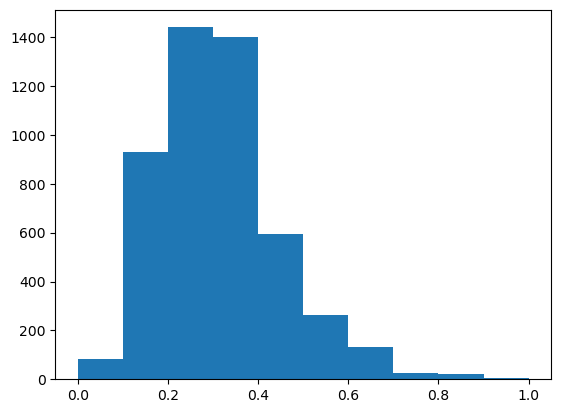

In [10]:
# 可视化归一化后的sulphates特征，这地方参考了助教发布的代码
plt.hist(X["sulphates"])
plt.show()

In [11]:
# 这里注意回归系数会比特征x多一维(常数维)，为了向量相乘方便，在训练集X左侧添加全为1的一列
Xs = pd.concat([pd.DataFrame(np.ones(X.shape[0]), columns=['add']), X], axis=1)
Xs

,add,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,1.0,0.307692,0.186275,0.216867,0.308282,0.106825,0.149826,0.373550,0.267785,0.254545,0.267442,0.129032
1,1.0,0.240385,0.215686,0.204819,0.015337,0.118694,0.041812,0.285383,0.132832,0.527273,0.313953,0.241935
2,1.0,0.413462,0.196078,0.240964,0.096626,0.121662,0.097561,0.204176,0.154039,0.490909,0.255814,0.338710
3,1.0,0.326923,0.147059,0.192771,0.121166,0.145401,0.156794,0.410673,0.163678,0.427273,0.209302,0.306452
4,1.0,0.326923,0.147059,0.192771,0.121166,0.145401,0.156794,0.410673,0.163678,0.427273,0.209302,0.306452
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,1.0,0.230769,0.127451,0.174699,0.015337,0.089021,0.076655,0.192575,0.077694,0.500000,0.325581,0.516129
4894,1.0,0.269231,0.235294,0.216867,0.113497,0.112760,0.191638,0.368910,0.150183,0.390909,0.279070,0.258065
4895,1.0,0.259615,0.156863,0.114458,0.009202,0.094955,0.097561,0.236659,0.104685,0.245455,0.279070,0.225806
4896,1.0,0.163462,0.205882,0.180723,0.007669,0.038576,0.062718,0.234339,0.030461,0.563636,0.186047,0.774194


### 数据集与训练集划分

In [12]:
ndata = pd.concat([Xs, Y], axis=1)# 将处理过后的特征和标签再次拼接到一个dataframe中
train_data = ndata.groupby('quality').apply(lambda group: group.sample(frac=0.8))# 按照80%的比例分层抽样获取到训练集
train_data.index = train_data.index.droplevel(0)
test_data = ndata[~data.index.isin(train_data.index)]# 获取到测试集
train_X = train_data.iloc[:, 0:-1]
train_Y= train_data.iloc[:,-1]
test_X = test_data.iloc[:, 0:-1]
test_Y= test_data.iloc[:,-1]
train_Y = train_Y.values.reshape(-1, 1)
test_Y = test_Y.values.reshape(-1, 1)

print(train_X.shape, train_Y.shape, test_X.shape, test_Y.shape)

(3918, 12) (3918, 1) (980, 12) (980, 1)


### 回归系数初始化与MSE函数定义

In [13]:
# 初始化回归系数
W_init = np.random.randn(train_X.shape[1], 1)
W_init

array([[-0.0323809 ],
       [ 2.28211716],
       [ 0.94004977],
       [-0.2972772 ],
       [ 1.01261219],
       [-0.67747304],
       [ 1.59180715],
       [-1.10930154],
       [ 1.30264046],
       [-0.5953144 ],
       [-1.17190677],
       [-0.1105232 ]])

这里我计算MSE的公式采用的是：

$$Loss=\frac{1}{2N}\sum_{i=1}^N(y^{(i)}-f(\pmb{x}^{(i)},\pmb{\theta}))^2$$

In [14]:
# 定义出MSE函数，参数 X: 数据矩阵，Y: 真实标签，W: 权重向量
def MSE(X, Y, W):
    return (np.sum(np.power((np.dot(X, W) - Y), 2)) / Y.size)/2

### 批量梯度下降与随机梯度下降


#### 批量梯度下降

其公式如下：

![image.png](https://s2.loli.net/2022/10/04/TB4DmndiJ9OVPYk.png)

In [15]:
# 实现BGD，weight参数代表系数数组，a代表学习率，n代表迭代次数
def BGD(train_X,train_Y,test_X,test_Y,weight,a,n):
    weighttemp=copy.deepcopy(weight)
    # 初始化两个列表存训练集和测试集的MSE，一次迭代记录一次
    BM_train=[]
    BM_test=[]
    BM_train.append(MSE(train_X,train_Y,weighttemp))
    BM_test.append(MSE(test_X,test_Y,weighttemp))
    for i in range(n):
        for j in range(train_X.shape[1]):#遍历每个系数，根据上文公式更新每个系数
            train_X_j=train_X.iloc[:,j].values.reshape(-1,1)
            weighttemp[j]=weighttemp[j]+a * np.dot((train_Y-np.dot(train_X,weighttemp)).T,train_X_j) / train_X.shape[0]
        BM_train.append(MSE(train_X,train_Y,weighttemp))
        BM_test.append(MSE(test_X,test_Y,weighttemp))
    return BM_train,BM_test,weighttemp

In [16]:
# 令学习率为0.005，迭代次数为100进行训练一次，并输出MSE的值
BM_train,BM_test,weight=BGD(train_X,train_Y,test_X,test_Y,W_init,0.005,100)
print(BM_train)
print(BM_test)

[16.98202034531835, 16.693304683261353, 16.409627815621867, 16.13090179340716, 15.857040202719629, 15.5879581379627, 15.323572175514407, 15.063800347860427, 14.808562118178699, 14.557778355367557, 14.311371309509802, 14.069264587764987, 13.831383130682521, 13.597653188928186, 13.368002300416888, 13.142359267844542, 12.920654136612123, 12.702818173135038, 12.4887838435311, 12.278484792680466, 12.071855823651104, 11.868832877483351, 11.669353013327333, 11.473354388927058, 11.28077624144517, 11.091558868622352, 10.90564361026564, 10.722972830059799, 10.54348989769618, 10.367139171313523, 10.19386598024522, 10.023616608067742, 9.856338275944918, 9.691979126262925, 9.530488206550972, 9.371815453682567, 9.215911678352587, 9.06272854982527, 8.912218580948434, 8.764335113429258, 8.61903230336706, 8.476265107038595, 8.335989266931469, 8.198161298021306, 8.062738474288484, 7.92967881547015, 7.7989410740435385, 7.670484722436427, 7.54426994046087, 7.420257602966232, 7.29840926770777, 7.1786871634

然后画出对应的MSE收敛曲线


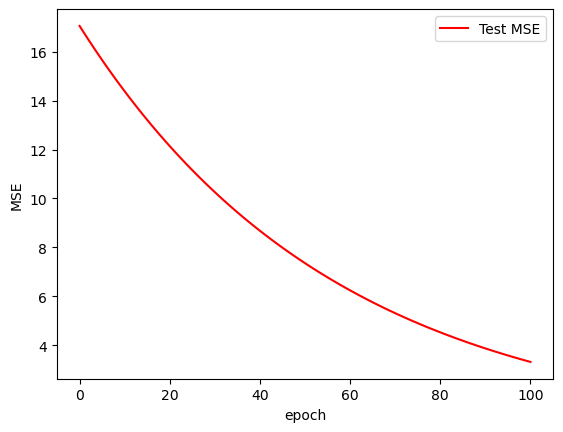

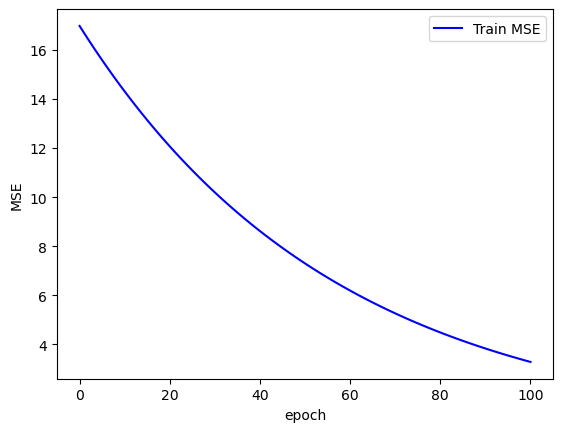

In [17]:
# 由于两条画在一起会重合，于是我分开画训练集的MSE收敛曲线和测试集的MSE收敛曲线
plt.figure()

plt.plot(BM_test, label='Test MSE', color='red')

plt.legend()# 添加图例
plt.xlabel('epoch')
plt.ylabel('MSE')
plt.show()

plt.figure()

plt.plot(BM_train, label='Train MSE', color='blue')

plt.legend()# 添加图例
plt.xlabel('epoch')
plt.ylabel('MSE')
plt.show()

#### 随机梯度下降

其公式如下：

![image.png](https://s2.loli.net/2022/10/04/u6YUkgCxZ7s48ft.png)

In [18]:
print(type(train_X),type(train_Y))
# 实现SGD，weight参数代表系数数组，a代表学习率，n代表迭代次数
def SGD(train_X,train_Y,test_X,test_Y,weight,a,n):
    weighttemp=copy.deepcopy(weight)
    # 初始化两个列表存训练集和测试集的MSE，一次迭代记录一次
    SM_train=[]
    SM_test=[]
    SM_train.append(MSE(train_X,train_Y,weighttemp))
    SM_test.append(MSE(test_X,test_Y,weighttemp))
    for i in range(n):
        for j in random.sample(range(train_X.shape[0]),train_X.shape[0]):
            Xuse=train_X.iloc[j,:].values.reshape(1,-1)
            Yuse=train_Y[j,:].reshape(-1,1)
            for k in range(train_X.shape[1]):
                Xuse_k=Xuse[:,k].reshape(-1,1)
                weighttemp[k]=weighttemp[k]+a * (Yuse-np.dot(Xuse,weighttemp)) * Xuse_k
        SM_train.append(MSE(train_X,train_Y,weighttemp))
        SM_test.append(MSE(test_X,test_Y,weighttemp))
    return SM_train,SM_test,weighttemp

<class 'pandas.core.frame.DataFrame'> <class 'numpy.ndarray'>


In [19]:
# 令学习率为0.00001，迭代次数为100进行训练一次，并输出MSE的值
SM_train,SM_test,weight=SGD(train_X,train_Y,test_X,test_Y,W_init,0.00001,100)
print(SM_train)
print(SM_test)

[16.98202034531835, 14.853202914718729, 12.998262341797913, 11.382200723541557, 9.973883947964318, 8.74690381633455, 7.677601664103983, 6.7459375947651, 5.934277967163557, 5.226986960853651, 4.610655182908395, 4.073641110459854, 3.605811168980415, 3.198053384420576, 2.8427257538787662, 2.53312206088095, 2.2634000231969944, 2.028284678923985, 1.8233873152312312, 1.6447815390946756, 1.4892205542351509, 1.3537080533333816, 1.2354992346533615, 1.132515802239956, 1.0427001151734279, 0.9644429939061431, 0.8962564733739514, 0.8367674678410079, 0.7849097413539771, 0.7396847872234015, 0.7002674337574368, 0.6659232910254475, 0.6359425198160027, 0.6098032796945952, 0.5869867392965437, 0.5670801822173764, 0.5496948507206474, 0.5345140289976987, 0.5212577658578581, 0.5096835289039482, 0.49957214034302105, 0.49071961657836366, 0.4829747792006403, 0.476210028006318, 0.4702731454097035, 0.465068444653766, 0.460503049841679, 0.45651064636513433, 0.4529922422694572, 0.44989722875912835, 0.44718029342602

然后画出对应的MSE收敛曲线


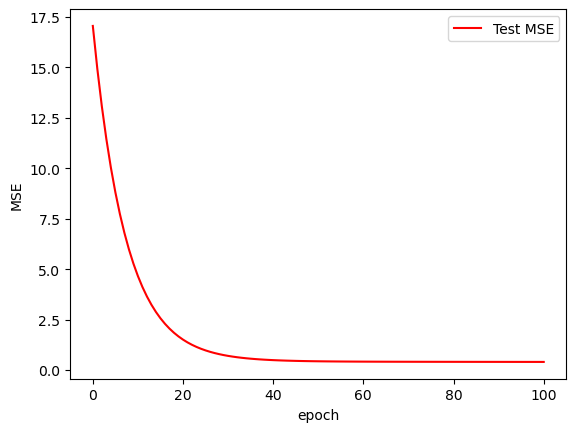

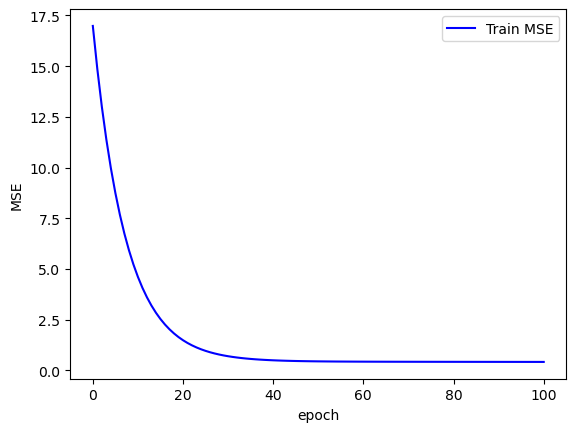

In [20]:
# 由于两条画在一起会重合，于是我分开画训练集的MSE收敛曲线和测试集的MSE收敛曲线
plt.figure()

plt.plot(SM_test, label='Test MSE', color='red')

plt.legend()# 添加图例
plt.xlabel('epoch')
plt.ylabel('MSE')
plt.show()

plt.figure()

plt.plot(SM_train, label='Train MSE', color='blue')

plt.legend()# 添加图例
plt.xlabel('epoch')
plt.ylabel('MSE')
plt.show()

### BGD和SGD在不同学习率条件下的MSE收敛曲线

这里我固定了迭代次数是100，由于可以发现SGD的收敛速度较快，如果用同一组学习率去测他们的话，可能会让SGD曲线不能体现出好效果，所以这里对于SGD我用一组较小的学习率来进行测试。



In [21]:
asB=[1,0.5,0.1,0.01,0.003,0.001,0.0001]
asS=[0.1,0.001,0.0001,0.00001,0.000003,0.000001,0.0000005]
BM2_train=[]
BM2_test=[]
SM2_train=[]
SM2_test=[]
for ab in asB:
    BM_train,BM_test,weight=BGD(train_X,train_Y,test_X,test_Y,W_init,ab,100)
    BM2_train.append(BM_train)
    BM2_test.append(BM_test)
for a in asS:
    SM_train,SM_test,weight=SGD(train_X,train_Y,test_X,test_Y,W_init,a,100)
    SM2_train.append(SM_train)
    SM2_test.append(SM_test)

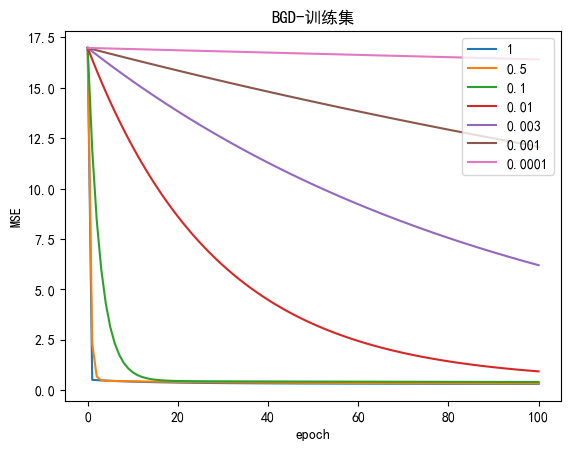

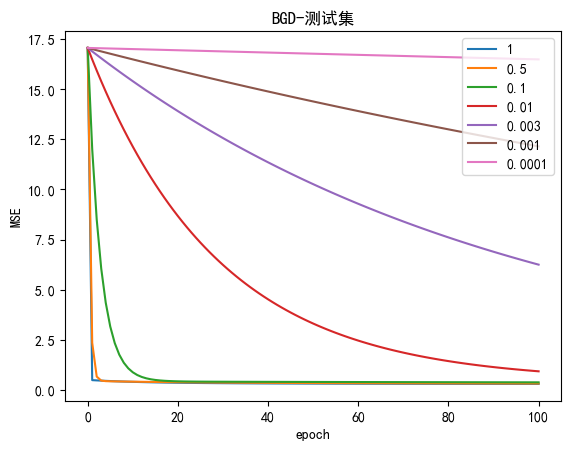

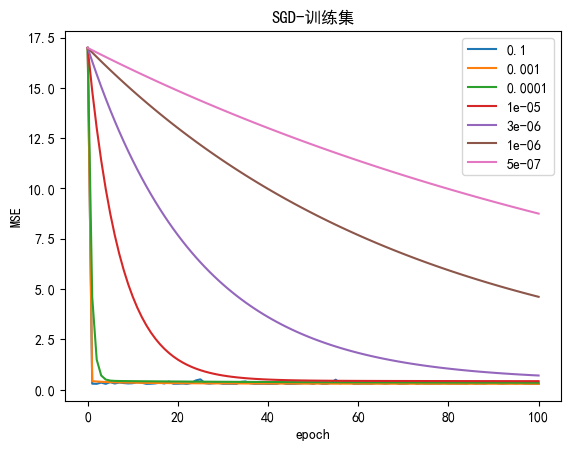

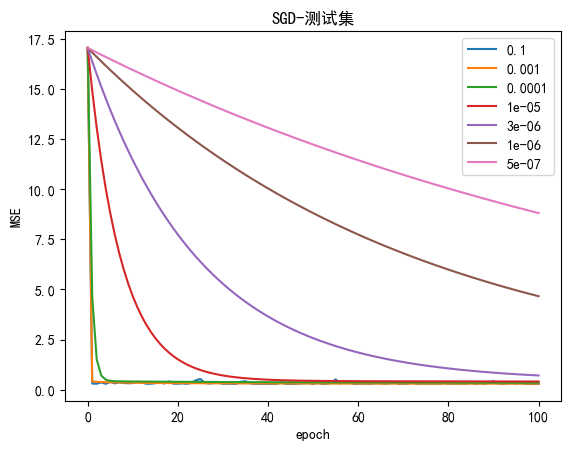

In [22]:
# 画图
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
# 总共四张图，分别是BGD、SGD在训练集和测试集上不同学习率下的MSE收敛曲线
plt.figure()
for i in range(len(asB)):
    plt.plot(range(100 + 1), BM2_train[i])
    
plt.xlabel("epoch")
plt.ylabel("MSE")
plt.title("BGD-训练集")

plt.legend(asB,loc='upper right')


plt.figure()
for i in range(len(asB)):
    plt.plot(range(100 + 1), BM2_test[i])
    
plt.xlabel("epoch")
plt.ylabel("MSE")
plt.title("BGD-测试集")

plt.legend(asB,loc='upper right')


plt.figure()
for i in range(len(asS)):
    plt.plot(range(100 + 1), SM2_train[i])

plt.xlabel("epoch")
plt.ylabel("MSE")
plt.title("SGD-训练集")

plt.legend(asS,loc='upper right')


plt.figure()
for i in range(len(asS)):
    plt.plot(range(100 + 1), SM2_test[i])

plt.xlabel("epoch")
plt.ylabel("MSE")
plt.title("SGD-测试集")

plt.legend(asS,loc='upper right')
plt.show()

#### 分析：

1. **结论一**：
观察上四图中的一、二图(批量梯度下降)，发现学习率过小的时候，收敛速度太慢，当学习率过大的时候，曲线迅速收敛并保持接近0的位置。当学习率处于0.01-0.1区间的时候，MSE曲线收敛效果好，想找到最佳学习率，还需要更加细粒度在这个区间上进行测试。

2. **结论二**：
观察上四图中的三、四图(随机梯度下降)，发现也是学习率过小的时候，收敛速度慢，当学习率过大的时候，曲线迅速收敛，但是收敛的位置在接近0的位置，但是出现了明显的抖动。当学习率处于0.0001到0.00001的区间，MSE曲线收敛效果较好，想找到最佳学习率，还需要更加细粒度在这个区间上进行测试。

3. **结论三**：
对比批量梯度下降和随机梯度下降，发现学习率量级有差距，说明随机梯度下降的收敛速度大大快于批量梯度下降，因此随机梯度下降可以更缩短模型训练时间，对于大量级数据训练更友好。

4. **结论四**：
但是如果在训练时候，没有设定收敛阈值并结束迭代的话，在相同的迭代次数下，SGD的速度会大大慢于BGD，这是由于BGD的计算是并行计算的，而SGD的计算是细粒度的，这也可以看出并行对模型训练速度的提升效果。


## 中级要求部分

探究回归模型在机器学习和统计学上的差异。

1. **目标与关注点**：
   - **统计学**：在统计学中，回归模型主要关注的是推断和解释。例如，当我建立一个统计回归模型时，我们会重点关注某些系数是否显著，以及它们与响应变量之间的关系等等。
   - **机器学习**：机器学习更关心预测的准确性和模型的泛化应用能力。虽然模型的可解释性在某些情况下也很重要，但主要目标通常是减少预测误差。

2. **复杂性与可解释性**：
   - **统计学**：统计模型往往更加简单，更加关注模型的解释性。这意味着模型可能不会捕捉到所有的复杂关系，但它提供了一个更清晰的框架来理解变量之间的关系。
   - **机器学习**：机器学习模型可能会更复杂，例如深度学习模型，这些模型可能很难解释，但可以提供更准确的预测，也就是很经典的黑盒问题，研究这方面可解释性的课题也是有不少的。

3. **数据量级与处理**：
   - **统计学**：统计方法通常在小样本情况下效果也不错，并且对数据的质量和来源有严格的要求。
   - **机器学习**：机器学习方法，尤其是深度学习，通常需要大量的数据来进行训练。并且机器学习模型往往对数据的预处理和特征工程非常敏感。

4. **验证和评估**：
   - **统计学**：统计学常常使用假设检验、置信区间等方法来评估模型的好坏和不确定性。
   - **机器学习**：机器学习更倾向于使用交叉验证、训练/测试集划分等方法来评估模型的预测能力。

5. **应用背景**：
   - **统计学**：统计学的应用往往更加偏向于科学研究、政策制定等领域，其中对因果关系的解释和证据的确凿性至关重要。
   - **机器学习**：机器学习更多地被应用于产业界，如推荐系统、自动驾驶等，其中预测的准确性和效率通常是主要关心的点，毕竟应用的最终目标就是效果好。

综上，回归模型在统计学和机器学习中都有其独特的地位和应用，但它们的目标和方法有所不同。统计学中的回归模型更关注于了解和解释数据，机器学习中的回归模型更关注于预测和泛化。不过，这两个不同领域的界限在近年来逐渐模糊。方法都可以互相交融。

## 高级要求部分

实现岭回归算法

岭回归在最小二乘估计的基础上增加了一项，即岭回归估计：
$$\pmb{\theta}=(\pmb{x}^T\pmb{x}+\lambda\pmb{I})^{-1}\pmb{x}^Ty$$

而岭回归模型的目标函数在线性模型的基础上加了L2范数的惩罚项：
$$Loss=\frac{1}{2N}\sum_{i=1}^N(y^{(i)}-f(\pmb{x}^{(i)},\pmb{\theta}))^2+\lambda \sum_{j=0}^N\theta_j^2$$

其中
$$ \lambda $$
是岭回归系数

In [23]:
# 这里我采用解析法，公式在上段，即可以直接取到最小值，较为快捷，而且由于之前已经实现过BGD和SGD
# 所以这里我尝试一下新方法，直接参考上文公式计算出系数即可。
def ridge(train_X,train_Y,rfactor):
    XM=np.mat(train_X)
    YM=np.mat(train_Y)
    tempM=XM.T * XM + rfactor * np.eye(XM.shape[1])
    if np.linalg.matrix_rank(tempM)!=tempM.shape[0]:#这里判断一下是否是满秩矩阵，不是满秩矩阵无法求逆
        return -1
    return tempM.I * XM.T * YM

In [27]:
# 分别计算训练集和测试集的loss，注意这里调用MSE后还要加上L2范数的惩罚项！！！！，这里取岭回归系数为0.1
rweight=ridge(train_X,train_Y,0.1)
L2=0.1 * np.sum(np.square(rweight))
print("average train loss:",MSE(train_X,train_Y,rweight)+L2)
print("average test loss:",MSE(test_X,test_Y,rweight)+L2)

average train loss: 8.159379298761893
average test loss: 8.162465516567892
